<a href="https://colab.research.google.com/github/zahraeissa/Machine-Learning-Projects/blob/main/regression_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd

od.download(
    "https://www.kaggle.com/datasets/muhamedumarjamil/house-price-prediction-dataset")




Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alzahraaeissa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/muhamedumarjamil/house-price-prediction-dataset


100%|██████████| 292k/292k [00:00<00:00, 304MB/s]

In [ ]:
data_path = "/content/house-price-prediction-dataset/house_prices_dataset.csv"
data = pd.read_csv(data_path)

data.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [ ]:
data.shape

(10000, 5)

In [ ]:
data.isnull().sum()

,0
square_feet,0
num_rooms,0
age,0
distance_to_city(km),0
price,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


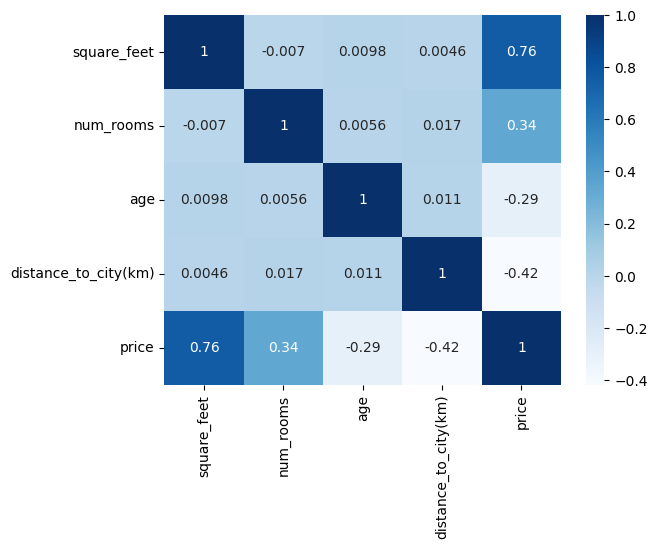

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data=data.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
# Detect outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Number of outliers detected:")
print(f"Total outliers across all columns: {len(outliers)}")
for column in data.columns:
    col_outliers = data[((data[column] < (Q1[column] - 1.5 * IQR[column])) | (data[column] > (Q3[column] + 1.5 * IQR[column])))]
    print(f"{column}: {len(col_outliers)}")

display(outliers)

Number of outliers detected:
Total outliers across all columns: 122
square_feet: 83
num_rooms: 0
age: 0
distance_to_city(km): 0
price: 64


,square_feet,num_rooms,age,distance_to_city(km),price
179,3360.084583,2,99,7.656454,406513.612495
209,3926.365745,7,0,19.343934,660168.255648
262,500.000000,3,76,12.561114,-14286.956405
471,849.039418,2,23,29.665812,-33373.818647
478,3539.440404,7,92,25.594193,435639.613594
...,...,...,...,...,...
9606,599.044215,2,33,19.913306,-36462.912810
9770,500.000000,3,2,5.999410,132002.234406
9787,2838.227481,7,29,1.086042,537102.221041
9834,3082.760726,7,16,13.937077,532605.602317


In [ ]:
# Remove outliers
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape of original data:", data.shape)
print("Shape of data after removing outliers:", data_cleaned.shape)
display(data_cleaned.head())

Shape of original data: (10000, 5)
Shape of data after removing outliers: (9878, 5)


,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


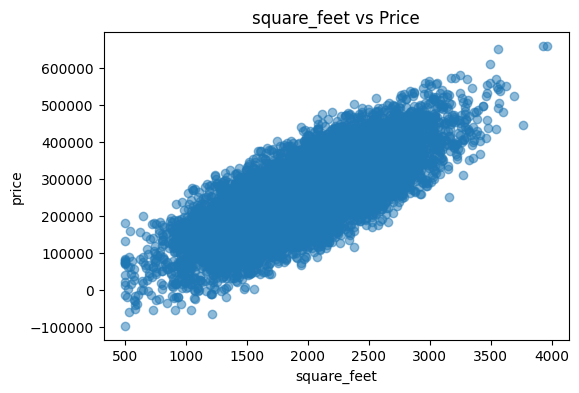

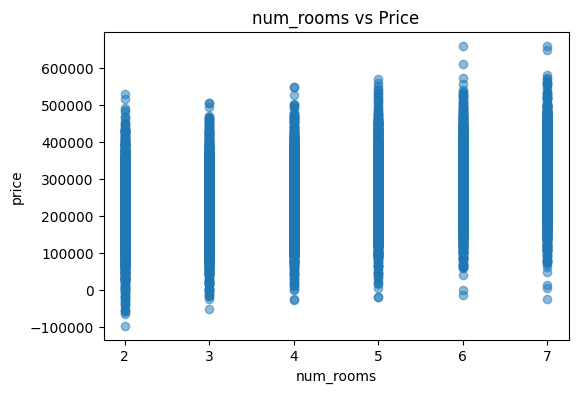

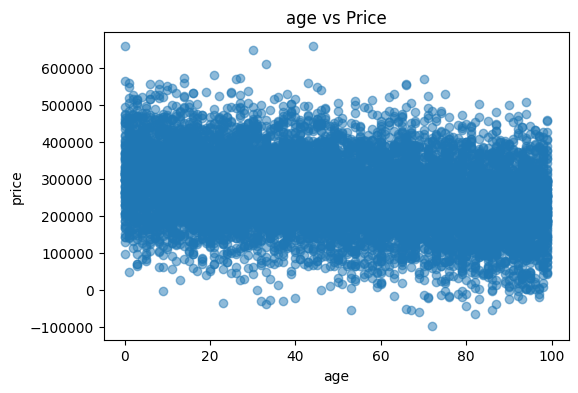

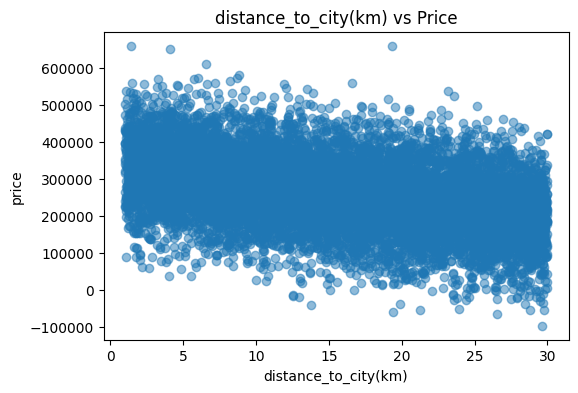

In [ ]:
import matplotlib.pyplot as plt
features = data.drop("price", axis=1).columns

for feature in features:
    plt.figure(figsize=(6,4))
    plt.scatter(data[feature], data["price"], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("price")
    plt.title(f"{feature} vs Price")
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop("price", axis=1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 386443817.4602803
R-squared: 0.960063695761787
